In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from dominance_analysis import Dominance

%matplotlib inline
%config InlineBackend.figure_format='retina' 

Loading BokehJS ...

In [2]:
# code for the font from https://github.com/scentellegher/code_snippets/blob/d6e3a65b0c4e715d982466f77d94c4f8b0827b38/matplotlib_font/Matplotlib_custom_font.ipynb

from matplotlib import font_manager

font_dirs = ['font/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

In [3]:
# import data

df = pd.read_csv('./data/county_data.csv',  dtype = {'fips' : 'str', 'rucc_grouped' : 'str', 'RUCC_2013' : 'str'})

In [4]:
# transform the variables in 0-100 scale

df['perc_nv_rep'] = df['perc_nv_rep'] * 100
df['perc_nv_dem'] = df['perc_nv_dem'] * 100

df['proximity_rep_coloc'] = df['proximity_rep_coloc'] * 100
df['proximity_dem_coloc'] = df['proximity_dem_coloc'] * 100

df['proximity_rep_sci'] = df['proximity_rep_sci'] * 100
df['proximity_dem_sci'] = df['proximity_dem_sci'] * 100

df['proximity_rep_comm'] = df['proximity_rep_comm'] * 100
df['proximity_dem_comm'] = df['proximity_dem_comm'] * 100

df['proximity_rep_res'] = df['proximity_rep_res'] * 100
df['proximity_dem_res'] = df['proximity_dem_res'] * 100


df['perc_african_american'] = df['perc_african_american'] * 100
df['perc_latino_hispanic'] = df['perc_latino_hispanic'] * 100
df['perc_unemployed'] = df['perc_unemployed'] * 100
df['perc_graduated'] = df['perc_graduated'] * 100
df['perc_urban_pop'] = df['perc_urban_pop'] * 100


In [5]:
# df subsets for each partisanship

df_rep = df[['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_rep']]

df_dem = df[['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_dem']]

### DOMINANCE ANALYSIS - REPUBLICAN DATAFRAME

In [6]:
dominance_rep = Dominance(data=df_rep, target='perc_nv_rep')
dominance_rep.incremental_rsquare()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9709800752142294

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 255 possible combinations of 8 features :


100%|██████████| 8/8 [00:00<00:00, 10.11it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 267.25it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



{'proximity_rep_coloc': 0.34263137446891145,
 'proximity_rep_sci': 0.2663868224997226,
 'proximity_rep_res': 0.19524402861427587,
 'perc_latino_hispanic': 0.004883481465258842,
 'perc_african_american': 0.04285136367130393,
 'perc_unemployed': 0.016049194762860736,
 'perc_graduated': 0.05640392085687378,
 'perc_urban_pop': 0.0465298888750221}

In [7]:
dominance_rep.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_rep_coloc,0.052839,0.962836,0.287563,0.342631,35.287168
proximity_rep_sci,0.00135,0.853889,0.212643,0.266387,27.434839
proximity_rep_res,0.002551,0.697881,0.143587,0.195244,20.107934
perc_graduated,0.00048,0.209583,0.040195,0.056404,5.808968
perc_urban_pop,0.000277,0.213559,0.026400,0.04653,4.792054
perc_african_american,0.000844,0.176048,0.027653,0.042851,4.413207
perc_unemployed,0.000015,0.063053,0.010888,0.016049,1.652886
perc_latino_hispanic,0.000033,0.017231,0.003634,0.004883,0.502944


### DOMINANCE ANALYSIS - DEMOCRATIC DATAFRAME

In [8]:
dominance_dem = Dominance(data=df_dem, target='perc_nv_dem')
dominance_dem.incremental_rsquare()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9683636502620686

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 255 possible combinations of 8 features :


100%|██████████| 8/8 [00:00<00:00,  9.22it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 353.61it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



{'proximity_dem_coloc': 0.3497798181776487,
 'proximity_dem_sci': 0.285622957992417,
 'proximity_dem_res': 0.1546952323747543,
 'perc_latino_hispanic': 0.0048607644213211,
 'perc_african_american': 0.05278237849305104,
 'perc_unemployed': 0.018375402245521463,
 'perc_graduated': 0.05356036790137811,
 'perc_urban_pop': 0.048686728655976855}

In [9]:
dominance_dem.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_dem_coloc,0.044584,0.959156,0.299083,0.34978,36.120709
proximity_dem_sci,0.001604,0.865488,0.236315,0.285623,29.495423
proximity_dem_res,0.001567,0.570881,0.110852,0.154695,15.974911
perc_graduated,0.000479,0.182337,0.040945,0.05356,5.531018
perc_african_american,0.000795,0.217876,0.033931,0.052782,5.450677
perc_urban_pop,0.000917,0.200255,0.031387,0.048687,5.027732
perc_unemployed,0.000012,0.074862,0.012022,0.018375,1.897572
perc_latino_hispanic,0.000011,0.017489,0.003564,0.004861,0.501957


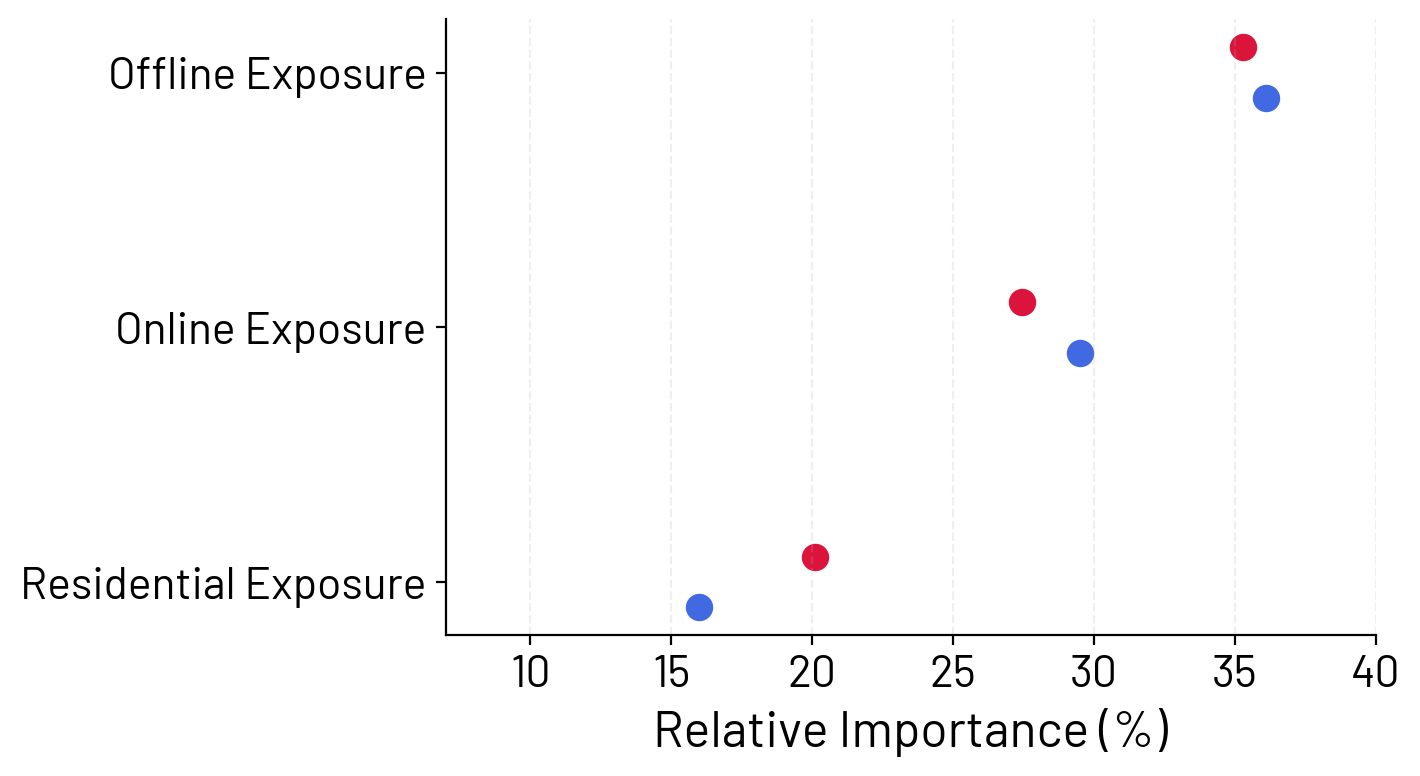

In [10]:
list1 = [35.28716842035261, 27.434839220665694, 20.10793358156178]
list2 = [36.12070920702028, 29.49542332729226, 15.974911112461632]
index_values=['Offline Exposure', 'Online Exposure', 'Residential Exposure']

# Reverse the order of values in each list
list1 = list1[::-1]
list2 = list2[::-1]
index_values = index_values[::-1]

# Calculate positions for the points
positions_list1 = np.arange(len(index_values))
positions_list2 = positions_list1 + 0.2  
plt.figure(figsize=(6,4)) 

plt.scatter(list1, positions_list2, label='Exposure to Republican voters', color='crimson', marker='o', s=70, linewidth=1.5)
plt.scatter(list2, positions_list1, label='Exposure to Democratic voters', color='royalblue', marker='o', s=70, linewidth=1.5)

plt.grid(True, linestyle='--', alpha=0.2, axis='x')

plt.xlim(7,40)

plt.xlabel('Relative Importance (%)', size=18)
plt.yticks(positions_list1 + 0.1, index_values, size=16)  
plt.xticks(size=16)

sns.despine()

## METRO AND NON-METRO AREAS

In [11]:
metro_areas = df[df['rucc_grouped'] == '1']
nonmetro_areas = df[df['rucc_grouped'] != '1']

metro_rep = metro_areas[['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_rep']]
metro_dem = metro_areas[['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_dem']]

nonmetro_rep = nonmetro_areas[['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_rep']]
nonmetro_dem = nonmetro_areas[['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_dem']]

### METRO

In [12]:
dominance_rep_metro = Dominance(data=metro_rep, target='perc_nv_rep')
dominance_rep_metro.incremental_rsquare()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9552789839613565

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 255 possible combinations of 8 features :


100%|██████████| 8/8 [00:00<00:00,  9.24it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 293.56it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



{'proximity_rep_coloc': 0.31121723205881324,
 'proximity_rep_sci': 0.2007597319710606,
 'proximity_rep_res': 0.2319922514184315,
 'perc_latino_hispanic': 0.0147311260893644,
 'perc_african_american': 0.03557688238860508,
 'perc_unemployed': 0.015373946830387909,
 'perc_graduated': 0.07475086888926569,
 'perc_urban_pop': 0.07087694431542804}

In [13]:
dominance_rep_metro.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_rep_coloc,0.052123,0.927305,0.251718,0.311217,32.578675
proximity_rep_res,0.011786,0.799454,0.174116,0.231992,24.285288
proximity_rep_sci,0.001519,0.726874,0.146281,0.20076,21.015822
perc_graduated,0.000827,0.297376,0.049967,0.074751,7.82503
perc_urban_pop,0.001369,0.326641,0.039834,0.070877,7.419502
perc_african_american,0.00166,0.145012,0.022990,0.035577,3.72424
perc_unemployed,0.000039,0.060931,0.010337,0.015374,1.609367
perc_latino_hispanic,0.0,0.060495,0.009559,0.014731,1.542076


In [14]:
dominance_dem_metro = Dominance(data=metro_dem, target='perc_nv_dem')
dominance_dem_metro.incremental_rsquare()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9468252980459047

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 255 possible combinations of 8 features :


100%|██████████| 8/8 [00:00<00:00,  9.88it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 334.51it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



{'proximity_dem_coloc': 0.31164609140994254,
 'proximity_dem_sci': 0.2201390531440771,
 'proximity_dem_res': 0.19377989436122828,
 'perc_latino_hispanic': 0.014920116698755252,
 'perc_african_american': 0.04382807808373704,
 'perc_unemployed': 0.017929508922236964,
 'perc_graduated': 0.07241067985506186,
 'perc_urban_pop': 0.07217187557086563}

In [15]:
dominance_dem_metro.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_dem_coloc,0.051659,0.916374,0.254189,0.311646,32.914846
proximity_dem_sci,0.002985,0.762566,0.165927,0.220139,23.250229
proximity_dem_res,0.007668,0.693444,0.141521,0.19378,20.466278
perc_graduated,0.00087,0.270723,0.051282,0.072411,7.647734
perc_urban_pop,0.003701,0.31066,0.043836,0.072172,7.622512
perc_african_american,0.001767,0.180305,0.028092,0.043828,4.628951
perc_unemployed,0.000067,0.073395,0.011662,0.01793,1.893645
perc_latino_hispanic,0.000032,0.060556,0.009795,0.01492,1.575805


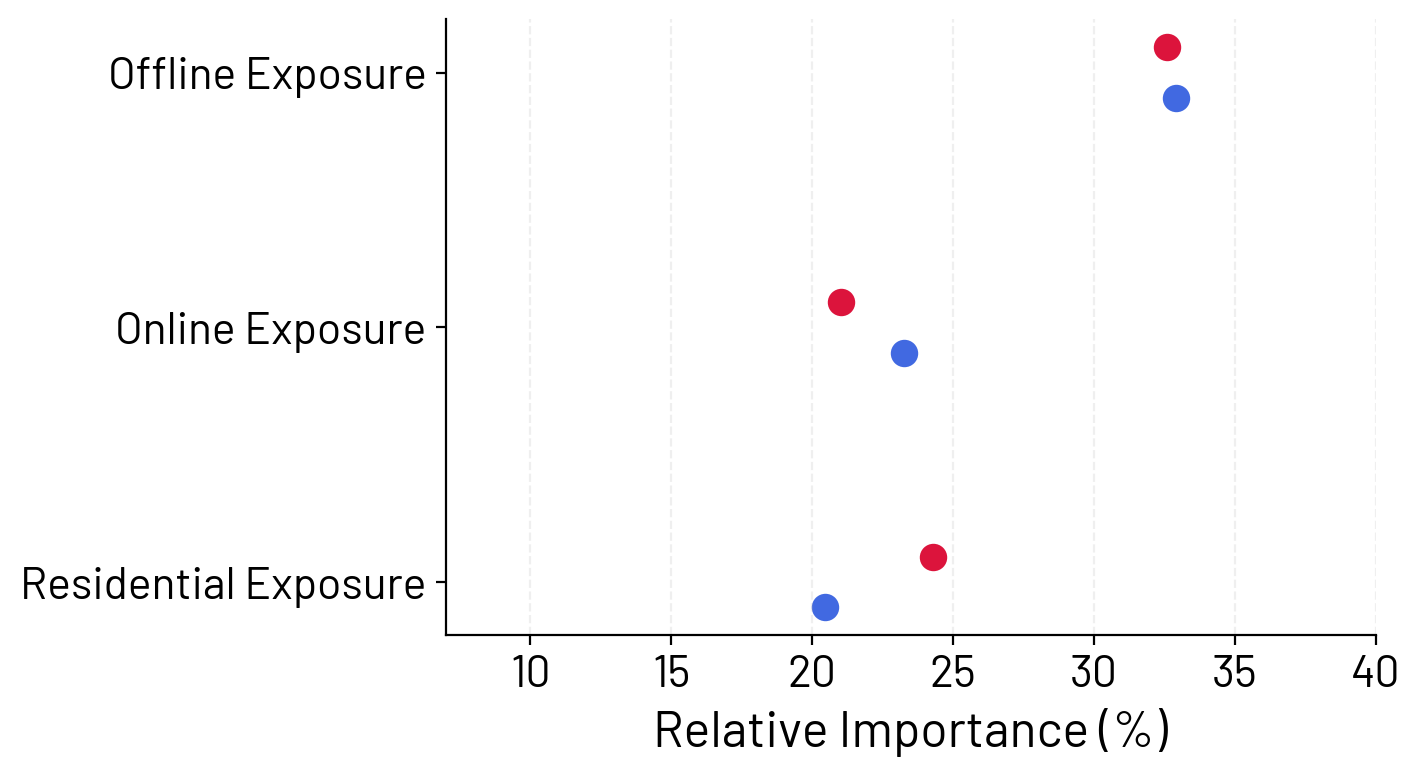

In [16]:
list1 = [32.578675, 21.015822, 24.285288]
list2 = [32.914846, 23.250229, 20.466278]
index_values=['Offline Exposure', 'Online Exposure', 'Residential Exposure']

# Reverse the order of values in each list
list1 = list1[::-1]
list2 = list2[::-1]
index_values = index_values[::-1]

# Calculate positions for the points
positions_list1 = np.arange(len(index_values))
positions_list2 = positions_list1 + 0.2  
plt.figure(figsize=(6,4)) 

plt.scatter(list1, positions_list2, label='Exposure to Republican voters', color='crimson', marker='o', s=70, linewidth=1.5)
plt.scatter(list2, positions_list1, label='Exposure to Democratic voters', color='royalblue', marker='o', s=70, linewidth=1.5)

plt.grid(True, linestyle='--', alpha=0.2, axis='x')

plt.xlim(7,40)

plt.xlabel('Relative Importance (%)', size=18)
plt.yticks(positions_list1 + 0.1, index_values, size=16)  
plt.xticks(size=16)

sns.despine()

### NON-METRO

In [17]:
dominance_rep_nonmetro = Dominance(data=nonmetro_rep, target='perc_nv_rep')
dominance_rep_nonmetro.incremental_rsquare()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9860247662053088

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 255 possible combinations of 8 features :


100%|██████████| 8/8 [00:00<00:00, 10.17it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 350.33it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



{'proximity_rep_coloc': 0.368723228605167,
 'proximity_rep_sci': 0.3304850042136217,
 'proximity_rep_res': 0.18346791247137273,
 'perc_latino_hispanic': 0.0017404276610657765,
 'perc_african_american': 0.04606071264245305,
 'perc_unemployed': 0.02025667057591118,
 'perc_graduated': 0.02365881554302384,
 'perc_urban_pop': 0.011631994492693545}

In [18]:
dominance_rep_nonmetro.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_rep_coloc,0.033474,0.982865,0.322241,0.368723,37.394926
proximity_rep_sci,0.001226,0.938518,0.284023,0.330485,33.516907
proximity_rep_res,0.000508,0.623425,0.140635,0.183468,18.606826
perc_african_american,0.000238,0.181181,0.031178,0.046061,4.671355
perc_graduated,0.000274,0.060213,0.021464,0.023659,2.399414
perc_unemployed,0.000004,0.084427,0.012937,0.020257,2.054377
perc_urban_pop,0.000158,0.049613,0.007214,0.011632,1.179686
perc_latino_hispanic,0.00009,0.003426,0.001735,0.00174,0.17651


In [19]:
dominance_dem_nonmetro = Dominance(data=nonmetro_dem, target='perc_nv_dem')
dominance_dem_nonmetro.incremental_rsquare()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9868635200516247

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 255 possible combinations of 8 features :


100%|██████████| 8/8 [00:00<00:00,  9.86it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 340.10it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



{'proximity_dem_coloc': 0.3818737715051407,
 'proximity_dem_sci': 0.3500927524946632,
 'proximity_dem_res': 0.14048607203742824,
 'perc_latino_hispanic': 0.001493191178696382,
 'perc_african_american': 0.058081913511048036,
 'perc_unemployed': 0.02306394523725655,
 'perc_graduated': 0.019861759990634303,
 'perc_urban_pop': 0.011910114096757312}

In [20]:
dominance_dem_nonmetro.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_dem_coloc,0.027059,0.985177,0.340459,0.381874,38.695702
proximity_dem_sci,0.000725,0.9471,0.308820,0.350093,35.475296
proximity_dem_res,0.000244,0.497242,0.104400,0.140486,14.235613
perc_african_american,0.00012,0.229318,0.039203,0.058082,5.885506
perc_unemployed,0.000009,0.09863,0.014312,0.023064,2.337096
perc_graduated,0.000156,0.040722,0.019669,0.019862,2.012615
perc_urban_pop,0.000066,0.042312,0.008817,0.01191,1.206865
perc_latino_hispanic,0.000002,0.003612,0.001389,0.001493,0.151307


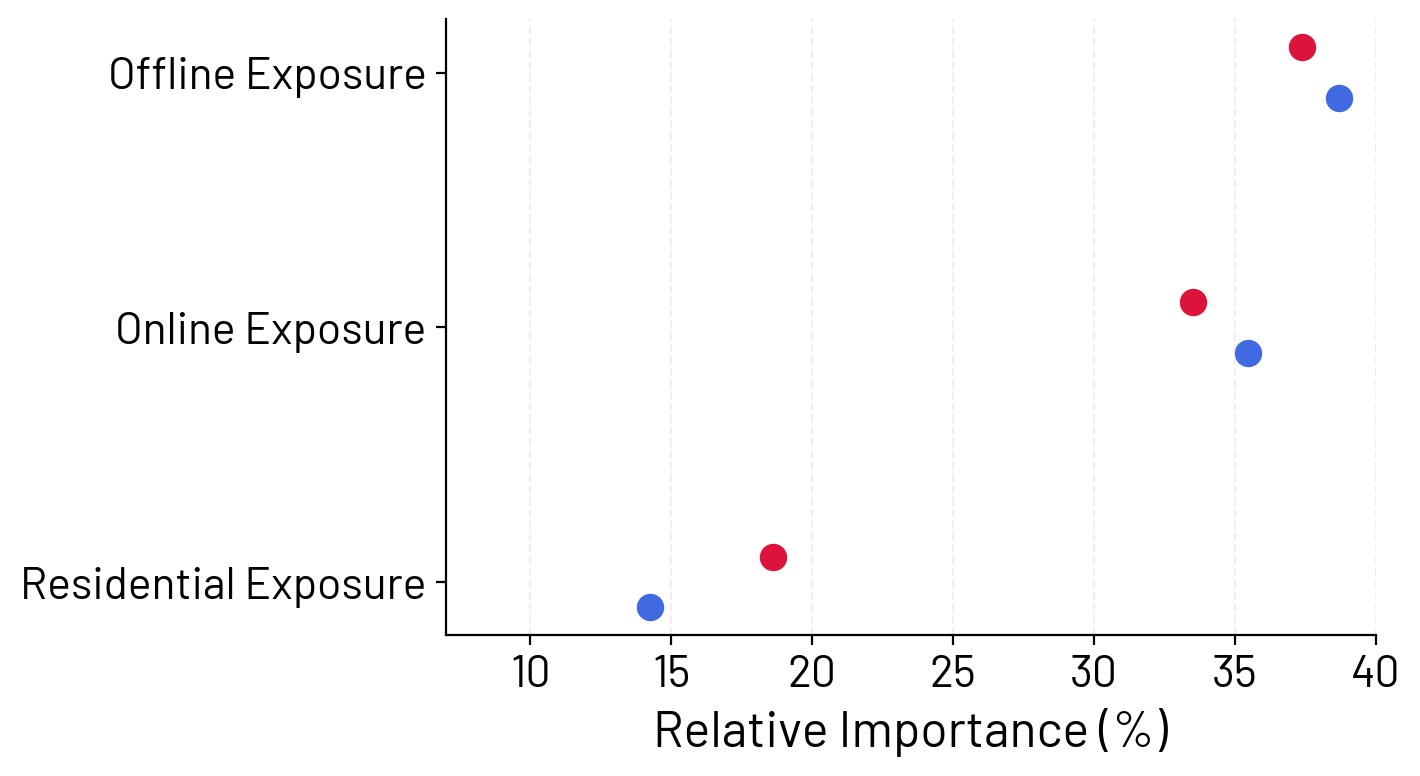

In [21]:
list1 = [37.394926, 33.516907, 18.606826]
list2 = [38.695702, 35.475296, 14.235613]
index_values=['Offline Exposure', 'Online Exposure', 'Residential Exposure']

# Reverse the order of values in each list
list1 = list1[::-1]
list2 = list2[::-1]
index_values = index_values[::-1]

# Calculate positions for the points
positions_list1 = np.arange(len(index_values))
positions_list2 = positions_list1 + 0.2  
plt.figure(figsize=(6,4)) 

plt.scatter(list1, positions_list2, label='Exposure to Republican voters', color='crimson', marker='o', s=70, linewidth=1.5)
plt.scatter(list2, positions_list1, label='Exposure to Democratic voters', color='royalblue', marker='o', s=70, linewidth=1.5)

plt.grid(True, linestyle='--', alpha=0.2, axis='x')

plt.xlim(7,40)

plt.xlabel('Relative Importance (%)', size=18)
plt.yticks(positions_list1 + 0.1, index_values, size=16)  
plt.xticks(size=16)

sns.despine()

## SWING COUNTIES

In [22]:
swing = df[df['n_swing'] > 0]
noswing = df[df['n_swing'] == 0]

swing_rep = swing[['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_rep']]
swing_dem = swing[['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_dem']]

noswing_rep = noswing[['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_rep']]
noswing_dem = noswing[['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_dem']]

### SWING

In [23]:
dom_swing_rep = Dominance(data=swing_rep, target='perc_nv_rep')
dom_swing_rep.incremental_rsquare()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.6996638935395869

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 255 possible combinations of 8 features :


100%|██████████| 8/8 [00:00<00:00,  9.86it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 261.71it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



{'proximity_rep_coloc': 0.3406773040376796,
 'proximity_rep_sci': 0.0924015470723657,
 'proximity_rep_res': 0.0760882437609346,
 'perc_latino_hispanic': 0.019561772373445738,
 'perc_african_american': 0.003839273691589603,
 'perc_unemployed': 0.009406565688337842,
 'perc_graduated': 0.08490888909773917,
 'perc_urban_pop': 0.0727802978174947}

In [24]:
dom_swing_rep.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_rep_coloc,0.138765,0.583793,0.333810,0.340677,48.691566
proximity_rep_sci,0.003156,0.159365,0.096115,0.092402,13.206562
perc_graduated,0.015808,0.161783,0.083613,0.084909,12.135668
proximity_rep_res,0.022102,0.166805,0.069966,0.076088,10.874971
perc_urban_pop,0.005507,0.166675,0.068344,0.07278,10.40218
perc_latino_hispanic,0.000267,0.055925,0.016717,0.019562,2.795881
perc_unemployed,0.001903,0.015739,0.009602,0.009407,1.344441
perc_african_american,0.000001,0.004028,0.004448,0.003839,0.548731


In [25]:
dom_swing_dem = Dominance(data=swing_dem, target='perc_nv_dem')
dom_swing_dem.incremental_rsquare()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.739666749122587

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 255 possible combinations of 8 features :


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00,  9.53it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 294.51it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



{'proximity_dem_coloc': 0.3391335645258179,
 'proximity_dem_sci': 0.11738778774867929,
 'proximity_dem_res': 0.07793567553823708,
 'perc_latino_hispanic': 0.024404382826314734,
 'perc_african_american': 0.037402030624329646,
 'perc_unemployed': 0.01716451587117432,
 'perc_graduated': 0.04902221686975621,
 'perc_urban_pop': 0.07721657511827787}

In [26]:
dom_swing_dem.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_dem_coloc,0.145357,0.570683,0.332838,0.339134,45.849508
proximity_dem_sci,0.012766,0.205874,0.120077,0.117388,15.870362
proximity_dem_res,0.014357,0.207603,0.066921,0.077936,10.536593
perc_urban_pop,0.012073,0.114725,0.081823,0.077217,10.439374
perc_graduated,0.005612,0.062632,0.053989,0.049022,6.627609
perc_african_american,0.008931,0.093538,0.032791,0.037402,5.056606
perc_latino_hispanic,0.00075,0.066172,0.021385,0.024404,3.299375
perc_unemployed,0.00082,0.048664,0.014639,0.017165,2.320574


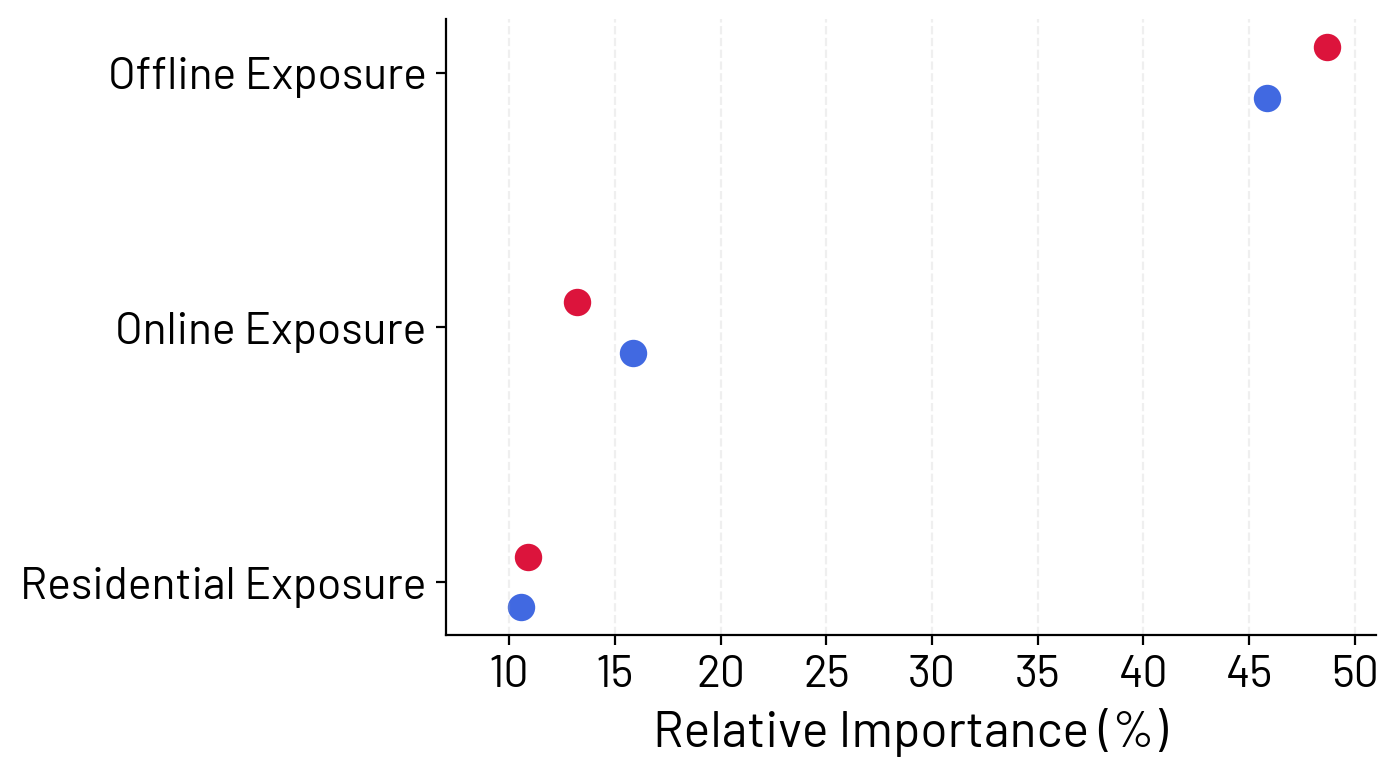

In [27]:
list1 = [48.691566, 13.206562, 10.874971]
list2 = [45.849508, 15.870362, 10.536593]
index_values=['Offline Exposure', 'Online Exposure', 'Residential Exposure']

# Reverse the order of values in each list
list1 = list1[::-1]
list2 = list2[::-1]
index_values = index_values[::-1]

# Calculate positions for the points
positions_list1 = np.arange(len(index_values))
positions_list2 = positions_list1 + 0.2  
plt.figure(figsize=(6,4)) 

plt.scatter(list1, positions_list2, label='Exposure to Republican voters', color='crimson', marker='o', s=70, linewidth=1.5)
plt.scatter(list2, positions_list1, label='Exposure to Democratic voters', color='royalblue', marker='o', s=70, linewidth=1.5)

plt.grid(True, linestyle='--', alpha=0.2, axis='x')

plt.xlim(7,51)

plt.xlabel('Relative Importance (%)', size=18)
plt.yticks(positions_list1 + 0.1, index_values, size=16)  
plt.xticks(size=16)

sns.despine()

### NON-SWING COUNTIES

In [28]:
dom_noswing_rep = Dominance(data=noswing_rep, target='perc_nv_rep')
dom_noswing_rep.incremental_rsquare()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9713472557062149

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 255 possible combinations of 8 features :


100%|██████████| 8/8 [00:00<00:00,  9.42it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 304.37it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



{'proximity_rep_coloc': 0.3379028872568779,
 'proximity_rep_sci': 0.26145994176078496,
 'proximity_rep_res': 0.19157534964806838,
 'perc_latino_hispanic': 0.005288651056415848,
 'perc_african_american': 0.04955588363033887,
 'perc_unemployed': 0.018260055500490875,
 'perc_graduated': 0.059357763328619216,
 'perc_urban_pop': 0.04794672352461891}

In [29]:
dom_noswing_rep.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_rep_coloc,0.053158,0.963089,0.281163,0.337903,34.787033
proximity_rep_sci,0.001412,0.854835,0.205905,0.26146,26.917247
proximity_rep_res,0.002478,0.698471,0.138609,0.191575,19.722643
perc_graduated,0.000554,0.220634,0.042279,0.059358,6.11087
perc_african_american,0.001072,0.204556,0.031803,0.049556,5.101768
perc_urban_pop,0.000302,0.222886,0.026731,0.047947,4.936105
perc_unemployed,0.00001,0.073077,0.012166,0.01826,1.879869
perc_latino_hispanic,0.000063,0.01865,0.003933,0.005289,0.544466


In [30]:
dom_noswing_dem = Dominance(data=noswing_dem, target='perc_nv_dem')
dom_noswing_dem.incremental_rsquare()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9684941476026853

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 255 possible combinations of 8 features :


100%|██████████| 8/8 [00:00<00:00,  9.52it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 303.14it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



{'proximity_dem_coloc': 0.3425950773293138,
 'proximity_dem_sci': 0.2799077562371388,
 'proximity_dem_res': 0.1540987075811635,
 'perc_latino_hispanic': 0.0052928695160628855,
 'perc_african_american': 0.05971943167519159,
 'perc_unemployed': 0.020720710719969452,
 'perc_graduated': 0.0563897069720537,
 'perc_urban_pop': 0.04976988757179149}

In [31]:
dom_noswing_dem.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_dem_coloc,0.043518,0.9597,0.289591,0.342595,35.373996
proximity_dem_sci,0.001493,0.868723,0.228174,0.279908,28.901337
proximity_dem_res,0.001559,0.579722,0.108585,0.154099,15.911166
perc_african_american,0.00091,0.247411,0.038239,0.059719,6.166215
perc_graduated,0.000578,0.193054,0.042914,0.05639,5.822411
perc_urban_pop,0.000887,0.209296,0.031329,0.04977,5.138894
perc_unemployed,0.000004,0.085468,0.013382,0.020721,2.139477
perc_latino_hispanic,0.000001,0.018738,0.003934,0.005293,0.546505


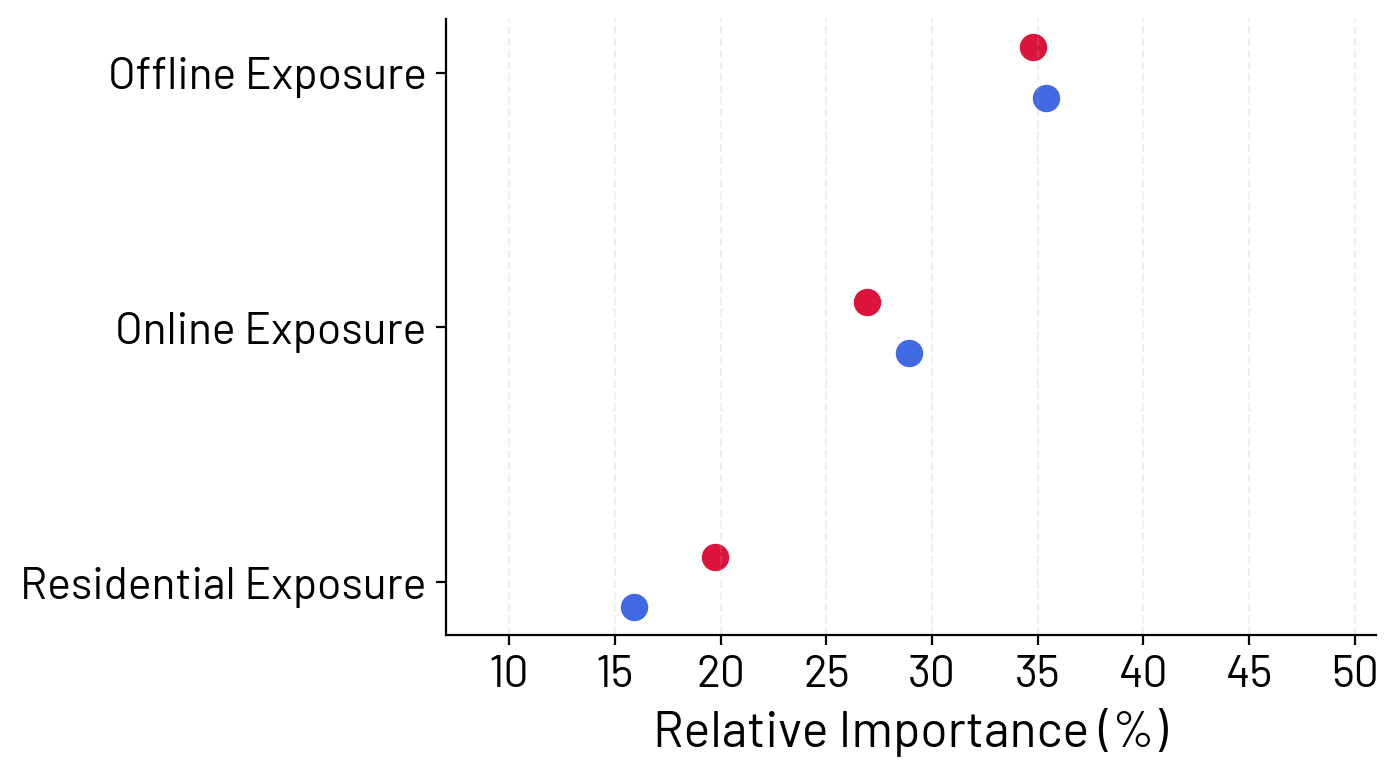

In [32]:
list1 = [34.787033, 26.917247, 19.722643]
list2 = [35.373996, 28.901337, 15.911166]
index_values=['Offline Exposure', 'Online Exposure', 'Residential Exposure']

# Reverse the order of values in each list
list1 = list1[::-1]
list2 = list2[::-1]
index_values = index_values[::-1]

# Calculate positions for the points
positions_list1 = np.arange(len(index_values))
positions_list2 = positions_list1 + 0.2  
plt.figure(figsize=(6,4)) 

plt.scatter(list1, positions_list2, label='Exposure to Republican voters', color='crimson', marker='o', s=70, linewidth=1.5)
plt.scatter(list2, positions_list1, label='Exposure to Democratic voters', color='royalblue', marker='o', s=70, linewidth=1.5)

plt.grid(True, linestyle='--', alpha=0.2, axis='x')

plt.xlim(7,51)

plt.xlabel('Relative Importance (%)', size=18)
plt.yticks(positions_list1 + 0.1, index_values, size=16)  
plt.xticks(size=16)

sns.despine()

# ROBUSTNESS CHECK SWING 4 ELECTIONS

In [33]:
swing08 = df[df['n_swing_0820'] > 0]
noswing08 = df[df['n_swing_0820'] == 0]

swing08_rep = swing08[['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_rep']]
swing08_dem = swing08[['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_dem']]

noswing08_rep = noswing08[['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_rep']]
noswing08_dem = noswing08[['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_dem']]


In [34]:
dom_swing08_rep = Dominance(data=swing08_rep, target='perc_nv_rep')
dom_swing08_rep.incremental_rsquare()
dom_swing08_rep.dominance_stats()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.8623718994591927

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 255 possible combinations of 8 features :


100%|██████████| 8/8 [00:00<00:00,  9.59it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 353.98it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_rep_coloc,0.100399,0.811005,0.369142,0.390782,45.314748
proximity_rep_sci,0.000085,0.495038,0.195217,0.208303,24.154696
perc_graduated,0.011212,0.221346,0.077352,0.087084,10.098198
proximity_rep_res,0.009409,0.211409,0.057803,0.070955,8.227833
perc_urban_pop,0.001645,0.184653,0.046978,0.058521,6.785994
perc_latino_hispanic,0.000746,0.081843,0.018029,0.023846,2.765108
perc_african_american,0.002395,0.057602,0.016871,0.020153,2.336948
perc_unemployed,0.000242,0.000032,0.003593,0.002729,0.316474


In [35]:
dom_swing08_dem = Dominance(data=swing08_dem, target='perc_nv_dem')
dom_swing08_dem.incremental_rsquare()
dom_swing08_dem.dominance_stats()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.8862738214366661

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 255 possible combinations of 8 features :


100%|██████████| 8/8 [00:00<00:00,  9.78it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 252.39it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_dem_coloc,0.114005,0.821753,0.397577,0.415152,46.842439
proximity_dem_sci,0.00462,0.486867,0.210011,0.218945,24.703936
perc_urban_pop,0.006365,0.160472,0.064432,0.069179,7.805563
perc_graduated,0.003132,0.152708,0.064023,0.067497,7.615846
perc_african_american,0.006749,0.132726,0.037090,0.045252,5.105887
proximity_dem_res,0.001503,0.144654,0.031335,0.041771,4.713104
perc_latino_hispanic,0.00019,0.086061,0.020629,0.026253,2.962187
perc_unemployed,0.000025,0.002066,0.002618,0.002225,0.251039


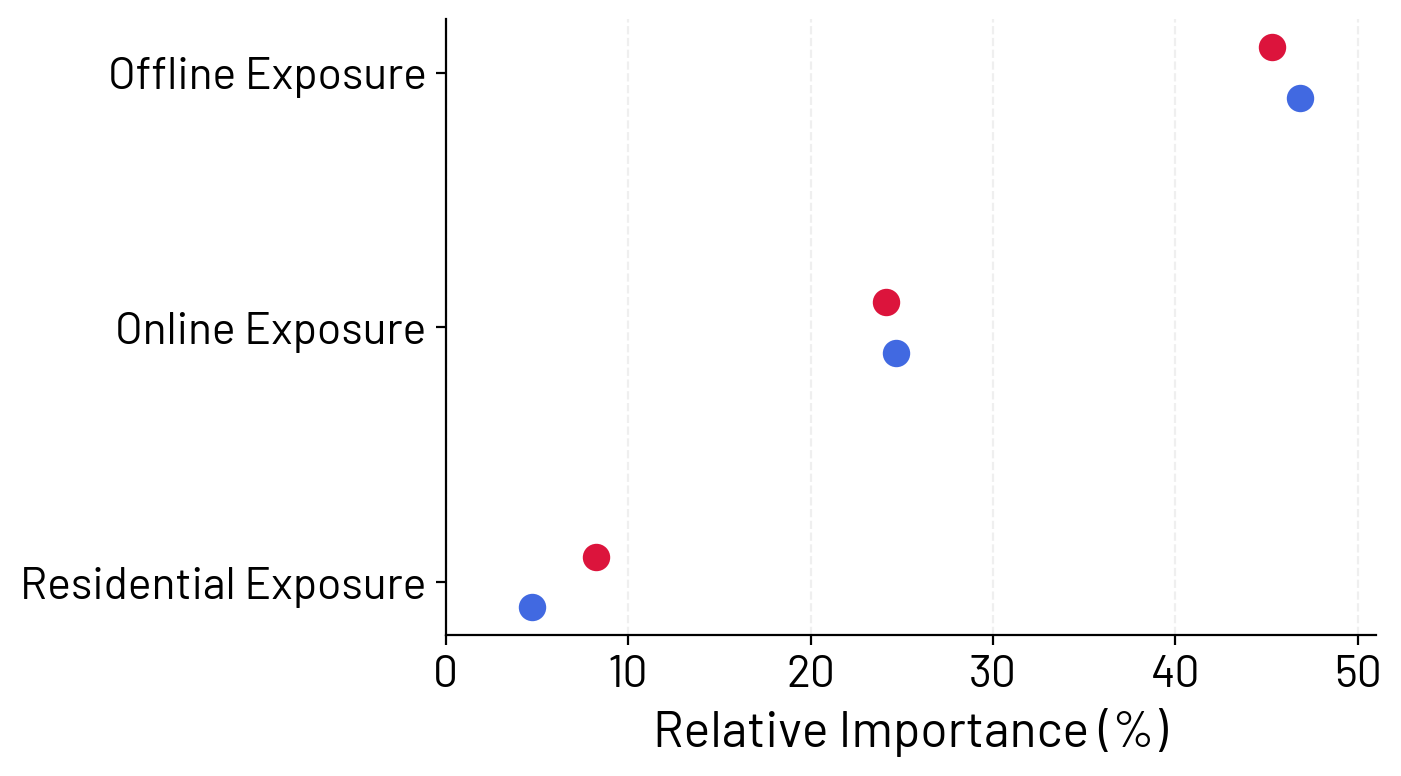

In [36]:
list1 = [45.314748, 24.154696, 8.227833]
list2 = [46.842439, 24.703936, 4.713104]
index_values=['Offline Exposure', 'Online Exposure', 'Residential Exposure']

# Reverse the order of values in each list
list1 = list1[::-1]
list2 = list2[::-1]
index_values = index_values[::-1]

# Calculate positions for the points
positions_list1 = np.arange(len(index_values))
positions_list2 = positions_list1 + 0.2  
plt.figure(figsize=(6,4)) 

plt.scatter(list1, positions_list2, label='Exposure to Republican voters', color='crimson', marker='o', s=70, linewidth=1.5)
plt.scatter(list2, positions_list1, label='Exposure to Democratic voters', color='royalblue', marker='o', s=70, linewidth=1.5)

plt.grid(True, linestyle='--', alpha=0.2, axis='x')

plt.xlim(0,51)

plt.xlabel('Relative Importance (%)', size=18)
plt.yticks(positions_list1 + 0.1, index_values, size=16)  
plt.xticks(size=16)

sns.despine()

In [37]:
dom_noswing08_rep = Dominance(data=noswing08_rep, target='perc_nv_rep')
dom_noswing08_rep.incremental_rsquare()
dom_noswing08_rep.dominance_stats()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9722983831795996

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 255 possible combinations of 8 features :


100%|██████████| 8/8 [00:00<00:00,  9.40it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 344.98it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_rep_coloc,0.052953,0.9643,0.274863,0.333304,34.280036
proximity_rep_sci,0.001578,0.857207,0.200106,0.257428,26.476213
proximity_rep_res,0.002284,0.711966,0.138097,0.192854,19.834902
perc_graduated,0.000499,0.22322,0.042721,0.060006,6.171544
perc_african_american,0.001118,0.219392,0.033965,0.053037,5.454839
perc_urban_pop,0.000309,0.230052,0.027220,0.04921,5.061186
perc_unemployed,0.000004,0.084855,0.013414,0.020668,2.125645
perc_latino_hispanic,0.000074,0.020272,0.004331,0.005791,0.595634


In [38]:
dom_noswing08_dem = Dominance(data=noswing08_dem, target='perc_nv_dem')
dom_noswing08_dem.incremental_rsquare()
dom_noswing08_dem.dominance_stats()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9692654504836035

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 255 possible combinations of 8 features :


100%|██████████| 8/8 [00:00<00:00,  9.22it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 369.37it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_dem_coloc,0.042879,0.960258,0.280697,0.335915,34.656673
proximity_dem_sci,0.001633,0.871359,0.220470,0.274476,28.317969
proximity_dem_res,0.001634,0.602417,0.110727,0.158552,16.357942
perc_african_american,0.00111,0.262946,0.040566,0.063431,6.544265
perc_graduated,0.000686,0.195484,0.043354,0.057037,5.88452
perc_urban_pop,0.000795,0.215777,0.031459,0.050666,5.227245
perc_unemployed,0.000003,0.098061,0.014798,0.023357,2.409719
perc_latino_hispanic,0.000003,0.020318,0.004389,0.005832,0.601667


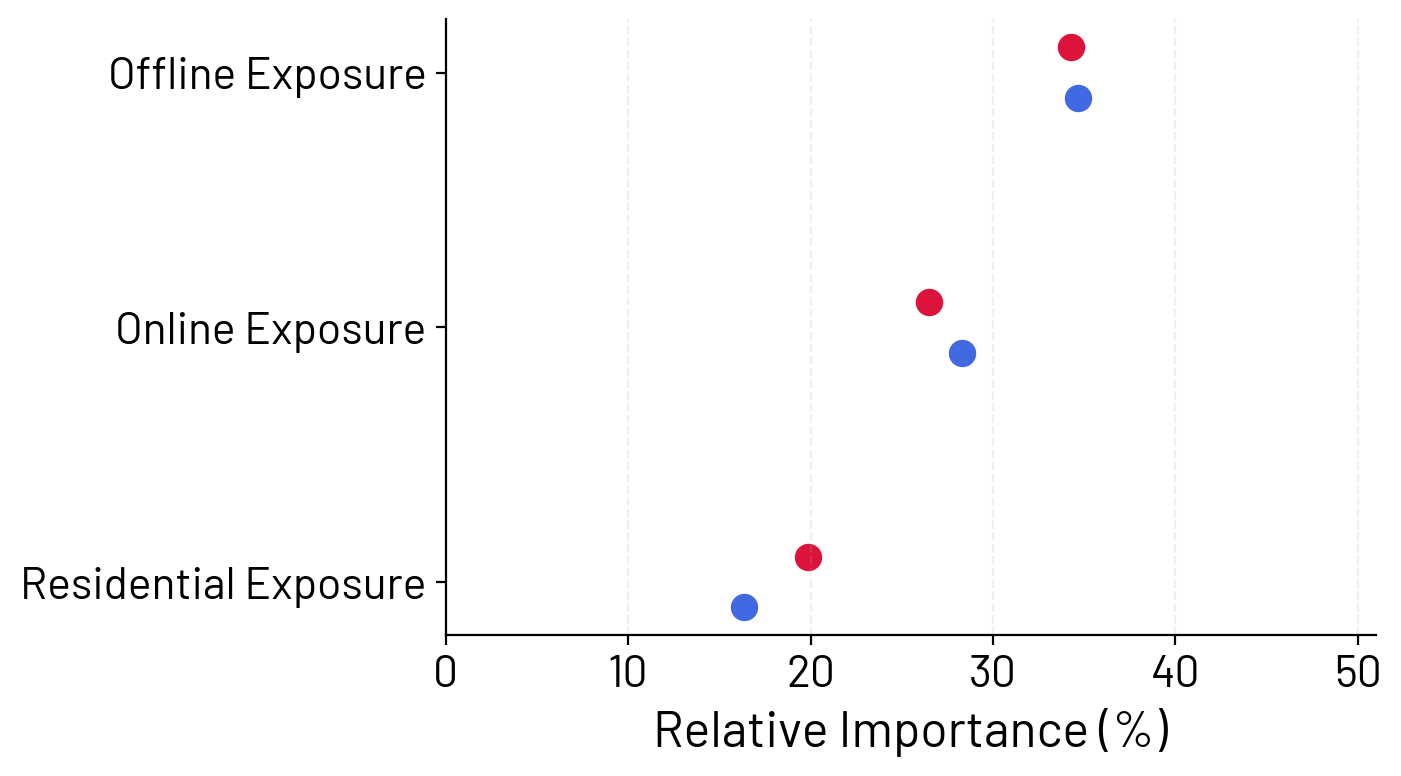

In [39]:
list1 = [34.280036, 26.476213, 19.834902]
list2 = [34.656673, 28.317969, 16.357942]
index_values=['Offline Exposure', 'Online Exposure', 'Residential Exposure']

# Reverse the order of values in each list
list1 = list1[::-1]
list2 = list2[::-1]
index_values = index_values[::-1]

# Calculate positions for the points
positions_list1 = np.arange(len(index_values))
positions_list2 = positions_list1 + 0.2  
plt.figure(figsize=(6,4)) 

plt.scatter(list1, positions_list2, label='Exposure to Republican voters', color='crimson', marker='o', s=70, linewidth=1.5)
plt.scatter(list2, positions_list1, label='Exposure to Democratic voters', color='royalblue', marker='o', s=70, linewidth=1.5)

plt.grid(True, linestyle='--', alpha=0.2, axis='x')

plt.xlim(0,51)

plt.xlabel('Relative Importance (%)', size=18)
plt.yticks(positions_list1 + 0.1, index_values, size=16)  
plt.xticks(size=16)

sns.despine()

# COMMUTING EXPOSURE

In [40]:
df_rep_comm = df[['proximity_rep_coloc', 'proximity_rep_comm', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_rep']].dropna()

df_dem_comm = df[['proximity_dem_coloc', 'proximity_dem_comm', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_dem']].dropna()

In [41]:
dominance_rep_comm = Dominance(data=df_rep_comm, target='perc_nv_rep')
dominance_rep_comm.incremental_rsquare()
dominance_rep_comm.dominance_stats()

Selecting 7 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_comm', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9665937470449149

Selecting 7 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_comm', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 127 possible combinations of 7 features :


100%|██████████| 7/7 [00:00<00:00, 15.40it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 6/6 [00:00<00:00, 1626.43it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_rep_coloc,0.02348,0.962702,0.356819,0.395754,40.943132
proximity_rep_comm,0.000041,0.931946,0.330123,0.368943,38.169379
perc_graduated,0.000799,0.20697,0.048604,0.064399,6.66242
perc_african_american,0.001542,0.177088,0.042838,0.056117,5.80564
perc_urban_pop,0.000532,0.211635,0.034702,0.055097,5.700094
perc_unemployed,0.000074,0.063017,0.016429,0.020748,2.146495
perc_latino_hispanic,0.00052,0.01708,0.004232,0.005537,0.57284


In [42]:
dominance_dem_comm = Dominance(data=df_dem_comm, target='perc_nv_dem')
dominance_dem_comm.incremental_rsquare()
dominance_dem_comm.dominance_stats()

Selecting 7 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_comm', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9646333541986011

Selecting 7 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_comm', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 127 possible combinations of 7 features :


100%|██████████| 7/7 [00:00<00:00, 15.31it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 6/6 [00:00<00:00, 754.01it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_dem_coloc,0.023039,0.95901,0.351490,0.391357,40.570542
proximity_dem_comm,0.0,0.930383,0.325782,0.365613,37.901787
perc_african_american,0.001266,0.219189,0.052752,0.069174,7.170995
perc_graduated,0.000837,0.179621,0.043361,0.056752,5.883228
perc_urban_pop,0.001736,0.198261,0.033380,0.052414,5.433522
perc_unemployed,0.000067,0.074858,0.018242,0.023734,2.460386
perc_latino_hispanic,0.000085,0.017331,0.004343,0.00559,0.57954


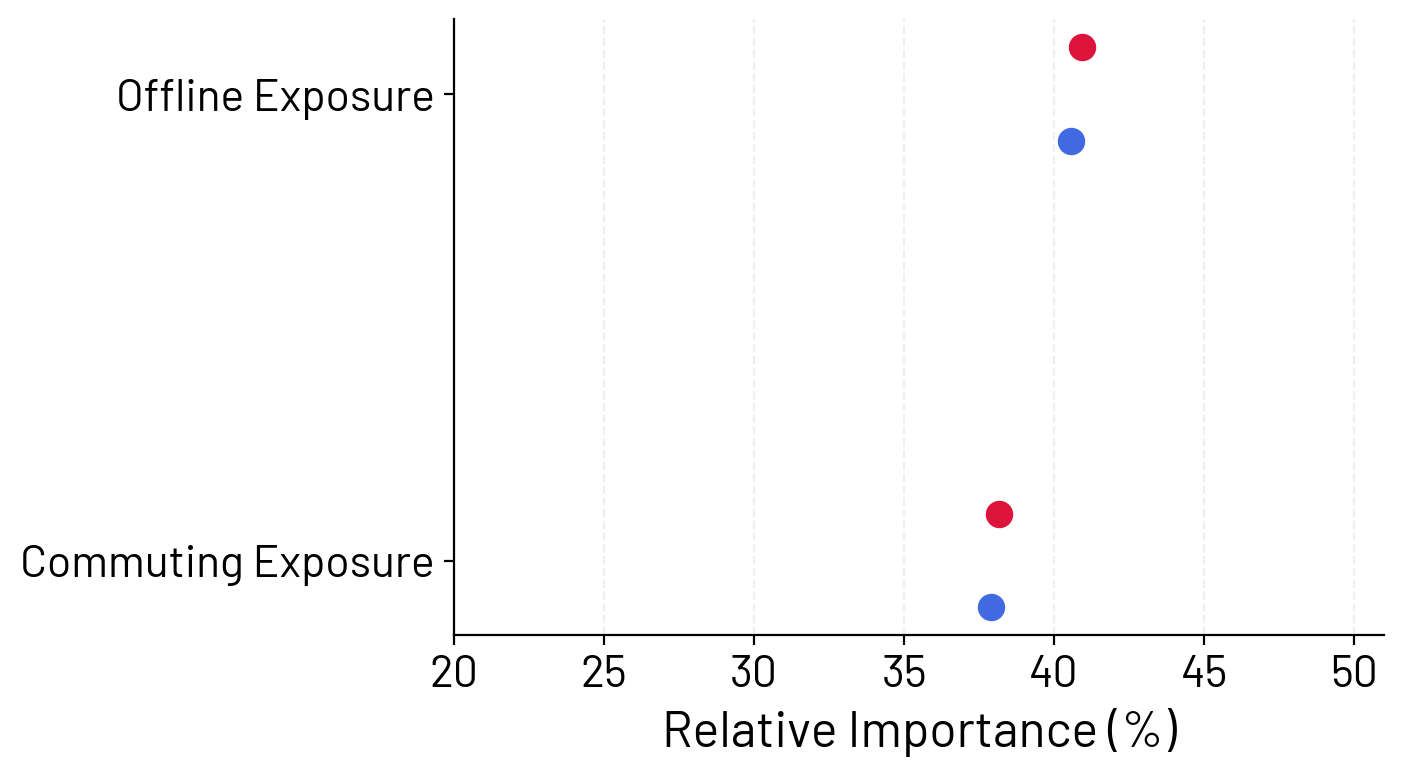

In [43]:
list1 = [40.943132, 38.169379]
list2 = [40.570542, 37.901787]
index_values=['Offline Exposure', 'Commuting Exposure']

# Reverse the order of values in each list
list1 = list1[::-1]
list2 = list2[::-1]
index_values = index_values[::-1]

# Calculate positions for the points
positions_list1 = np.arange(len(index_values))
positions_list2 = positions_list1 + 0.2  
plt.figure(figsize=(6,4)) 

plt.scatter(list1, positions_list2, label='Exposure to Republican voters', color='crimson', marker='o', s=70, linewidth=1.5)
plt.scatter(list2, positions_list1, label='Exposure to Democratic voters', color='royalblue', marker='o', s=70, linewidth=1.5)

plt.grid(True, linestyle='--', alpha=0.2, axis='x')

plt.xlim(20,51)

plt.xlabel('Relative Importance (%)', size=18)
plt.yticks(positions_list1 + 0.1, index_values, size=16)  
plt.xticks(size=16)

sns.despine()

### ALL EXPOSURES

In [44]:
df_rep_comm_all = df[['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'proximity_rep_comm', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_rep']].dropna()

df_dem_comm_all = df[['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'proximity_dem_comm', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop', 'perc_nv_dem']].dropna()

In [45]:
dominance_rep_comm_all = Dominance(data=df_rep_comm_all, target='perc_nv_rep')
dominance_rep_comm_all.incremental_rsquare()
dominance_rep_comm_all.dominance_stats()

Selecting 9 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'proximity_rep_comm', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9711713145893903

Selecting 9 Best Predictors for the Model
Selected Predictors :  ['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res', 'proximity_rep_comm', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 511 possible combinations of 9 features :


100%|██████████| 9/9 [00:01<00:00,  4.83it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 8/8 [00:00<00:00, 93.75it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_rep_coloc,0.020545,0.962702,0.186332,0.254175,26.17196
proximity_rep_comm,0.0003,0.931946,0.161400,0.229117,23.591774
proximity_rep_sci,0.001613,0.853406,0.135055,0.200045,20.598325
proximity_rep_res,0.002468,0.697649,0.097064,0.153285,15.783504
perc_graduated,0.000462,0.20697,0.027305,0.044285,4.559962
perc_urban_pop,0.000334,0.211635,0.019205,0.03849,3.963212
perc_african_american,0.000862,0.177088,0.019570,0.034993,3.603222
perc_unemployed,0.000014,0.063017,0.007591,0.012907,1.329055
perc_latino_hispanic,0.000029,0.01708,0.002538,0.003875,0.398987


In [46]:
dominance_dem_comm_all = Dominance(data=df_dem_comm_all, target='perc_nv_dem')
dominance_dem_comm_all.incremental_rsquare()
dominance_dem_comm_all.dominance_stats()

Selecting 9 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'proximity_dem_comm', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9684579420252839

Selecting 9 Best Predictors for the Model
Selected Predictors :  ['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res', 'proximity_dem_comm', 'perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']

Creating models for 511 possible combinations of 9 features :


100%|██████████| 9/9 [00:01<00:00,  4.81it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 8/8 [00:00<00:00, 93.61it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
proximity_dem_coloc,0.020344,0.95901,0.192265,0.258356,26.67709
proximity_dem_comm,0.000183,0.930383,0.167888,0.233976,24.159666
proximity_dem_sci,0.001774,0.864938,0.147705,0.211183,21.806092
proximity_dem_res,0.001593,0.570121,0.075455,0.122211,12.61917
perc_african_american,0.000834,0.219189,0.023897,0.043034,4.443513
perc_graduated,0.000482,0.179621,0.027598,0.041477,4.282771
perc_urban_pop,0.000856,0.198261,0.022310,0.039476,4.076222
perc_unemployed,0.000012,0.074858,0.008384,0.01484,1.532337
perc_latino_hispanic,0.000005,0.017331,0.002543,0.003904,0.40314


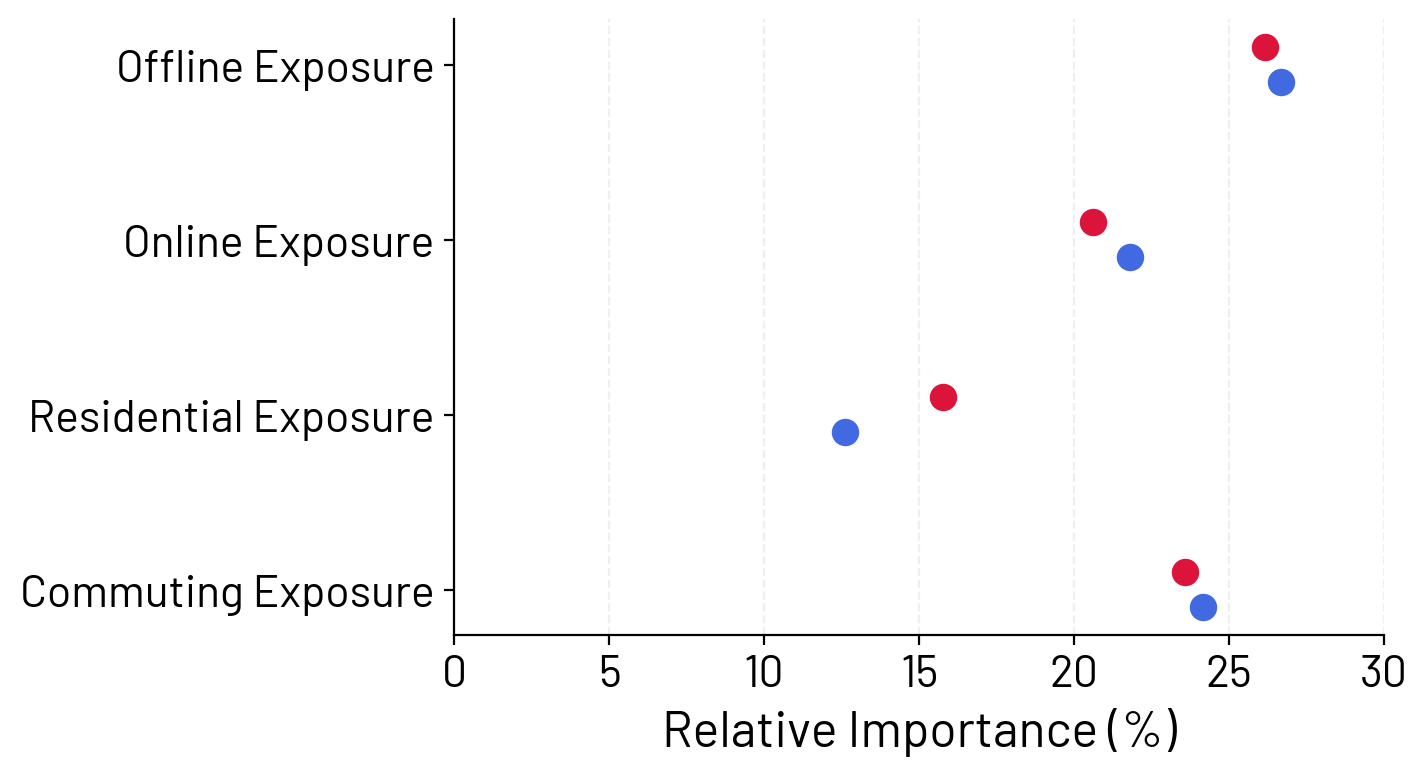

In [47]:
list1 = [26.17196, 20.598325, 15.783504, 23.591774]
list2 = [26.67709, 21.806092, 12.61917, 24.159666]
index_values=['Offline Exposure', 'Online Exposure', 'Residential Exposure','Commuting Exposure']

list1 = list1[::-1]
list2 = list2[::-1]
index_values = index_values[::-1]

positions_list1 = np.arange(len(index_values))
positions_list2 = positions_list1 + 0.2 
plt.figure(figsize=(6,4))  

plt.scatter(list1, positions_list2, label='Exposure to Republican voters', color='crimson', marker='o', s=70, linewidth=1.5)
plt.scatter(list2, positions_list1, label='Exposure to Democratic voters', color='royalblue', marker='o', s=70, linewidth=1.5)

plt.grid(True, linestyle='--', alpha=0.2, axis='x')

plt.xlim(0,30)
plt.xlabel('Relative Importance (%)', size=18)
plt.yticks(positions_list1 + 0.1, index_values, size=16)  
plt.xticks(size=16)
sns.despine()